# Exploratory Data Analysis

## Overview
Previously, we worked with two datasets:
1. **TMQ20 Dataset**: Likely contains tourism-related metrics (e.g., Area of Residence, Reason for Journey, Average Length of Stay, Expenditure, Percentage of Trips, Year).
2. **Trips per Quarter Dataset**: Contains trip-related data aggregated on a quarterly basis.

The goal was to merge these datasets, prepare the data, and apply descriptive statistics to gain insights.

## Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Custom Functions

In [6]:
def show_unique_values(data):
    columns = data.select_dtypes(include=['object']).columns
    for column in columns:
         print(f"Unique values in column '{column}':\n {data[column].unique()}\n")

def calculate_variance(data):
    columns= data.select_dtypes(exclude=['object']).columns
    for column in columns:
        print(f'Variance of {column}: {data[column].var()}')

def show_histplot(data, kde=True, bins=50, title=None):
    columns = data.select_dtypes(exclude=['object']).columns
    for column in columns:
        sns.histplot(data= data, x= column, kde= kde, bins=bins)
        plt.title(f"Histogram of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()

def show_boxplot(data):
    columns = data.select_dtypes(exclude=['object']).columns
    for column in columns:
        sns.boxplot(data= data, x=column, )
        plt.title(f"Boxplot of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()

def count_outliers_iqr(data, threshold=1.5):
    columns = data.select_dtypes(exclude=['object']).columns
    outlier_counts = {}
    for column in columns:
            q1 = data[column].quantile(0.25)
            q3 = data[column].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr

            outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
            outlier_counts[column] = len(outliers)
    return outlier_counts

## Ingesting Dataset

In [8]:
main_data = pd.read_csv(r"D:\CCT Learnings\Git\CCT_CA1\Dataset\Inbound Tourism.csv")

### Display the first 5 rows of the Datasets

In [10]:
main_data.head()

,Year,Quarter,Area of Residence,Reason for Journey,Avg Length of Stay,Expenditure,Overseas Trip Percentage,Total Trips,Number of Trips,Season
0,2012,1,All Countries,All reasons for journey,6.8,483.0,100.0,1165100,1165100.0,Winter
1,2012,2,All Countries,All reasons for journey,7.0,816.0,100.0,1817300,1817300.0,Spring
2,2012,3,All Countries,All reasons for journey,8.1,994.0,100.0,2096700,2096700.0,Summer
3,2012,4,All Countries,All reasons for journey,7.2,622.0,100.0,1438000,1438000.0,Autumn
4,2013,1,All Countries,All reasons for journey,6.7,541.0,100.0,1251700,1251700.0,Winter


#### Distinct values in each columns

To extract and analyze the distinct values from each column in the dataset, providing an overview of the unique entries. Show the number of unique values and examples of distinct entries for each column.

In [13]:
show_unique_values(main_data)

Unique values in column 'Area of Residence':
 ['All Countries' 'France' 'Germany' 'Great Britain' 'Italy'
 'Other Europe (14)' 'Other countries (24)' 'United States and Canada']

Unique values in column 'Reason for Journey':
 ['All reasons for journey' 'Business' 'Holiday/leisure/recreation'
 'Other reason for journey' 'Visit to friends/relatives']

Unique values in column 'Season':
 ['Winter' 'Spring' 'Summer' 'Autumn']



#### Removing 'All countries' and unwanted columns

Creating a new DataFrame by removing rows where the `Area of residence` column contains the value **All Countries**, as these rows represent aggregate values and dropping `Overseas Trip Percentage` and `Total Trips` as they are not required for analysis

In [16]:
data_drop = main_data[main_data['Area of Residence'] != 'All Countries'].reset_index()

In [17]:
data_drop = data_drop.drop(columns=['index', 'Overseas Trip Percentage', 'Total Trips'], axis=1)

In [18]:
data_drop.head()

,Year,Quarter,Area of Residence,Reason for Journey,Avg Length of Stay,Expenditure,Number of Trips,Season
0,2012,1,France,All reasons for journey,7.8,29.0,69906.0,Winter
1,2012,2,France,All reasons for journey,8.5,63.0,127211.0,Spring
2,2012,3,France,All reasons for journey,10.6,66.0,125802.0,Summer
3,2012,4,France,All reasons for journey,9.6,31.0,71900.0,Autumn
4,2013,1,France,All reasons for journey,7.9,37.0,87619.0,Winter


#### Check Duplicated Values

Duplicates can lead to biased analysis and inaccurate results, so identifying and handling them is crucial. Duplicates can skew summary statistics and analysis results. Redundant rows can negatively impact the performance of machine learning models.

In [21]:
data_drop.duplicated().sum()

0

Confirmed that no duplicated rows exist in the dataset.

#### Check Null Values

Null values can lead to incomplete or biased analysis, so identifying and handling them is essential. They can result in missing information, affecting the accuracy of analysis. Many machine learning algorithms cannot handle null values, so they must be addressed before modeling. They also skew summary statistics and visualizations.


In [25]:
data_drop.isnull().sum()

Year                  0
Quarter               0
Area of Residence     0
Reason for Journey    0
Avg Length of Stay    0
Expenditure           0
Number of Trips       0
Season                0
dtype: int64

The dataset contains no null values, ensuring that all entries are complete.

### Summary Statistics on the datasets

In [28]:
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120 entries, 0 to 1119
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                1120 non-null   int64  
 1   Quarter             1120 non-null   int64  
 2   Area of Residence   1120 non-null   object 
 3   Reason for Journey  1120 non-null   object 
 4   Avg Length of Stay  1120 non-null   float64
 5   Expenditure         1120 non-null   float64
 6   Number of Trips     1120 non-null   float64
 7   Season              1120 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 70.1+ KB


In [29]:
data_drop.describe()

,Year,Quarter,Avg Length of Stay,Expenditure,Number of Trips
count,1120.000000,1120.000000,1120.000000,1120.000000,1.120000e+03
mean,2015.500000,2.500000,9.608839,60.075000,3.154911e+05
std,2.292311,1.118533,6.530135,85.340708,3.066590e+05
min,2012.000000,1.000000,0.500000,1.000000,1.165100e+04
25%,2013.750000,1.750000,5.900000,9.000000,1.077660e+05
50%,2015.500000,2.500000,7.900000,30.000000,1.939630e+05
75%,2017.250000,3.250000,10.500000,69.000000,4.082805e+05
max,2019.000000,4.000000,49.400000,681.000000,1.867515e+06


In [30]:
calculate_variance(data_drop)

Variance of Year: 5.254691689008043
Variance of Quarter: 1.2511170688114388
Variance of Avg Length of Stay: 42.642665318205026
Variance of Expenditure: 7283.036371760516
Variance of Number of Trips: 94039735112.54329


#### Pairplot and Heatmap correlation for analysis

As part of my analysis , 
- I use **Pairplot** to quickly and effectively explore relationships and patterns in my dataset. It allows me to visualize multiple pairwise relationships in a single plot, saving time during EDA.
- I use **Heatmap Correlation** to visually represent the relationships and dependencies between numerical variables in a dataset. It provides a clear, color-coded matrix of correlation coefficients, making it easy to interpret relationships at a glance.

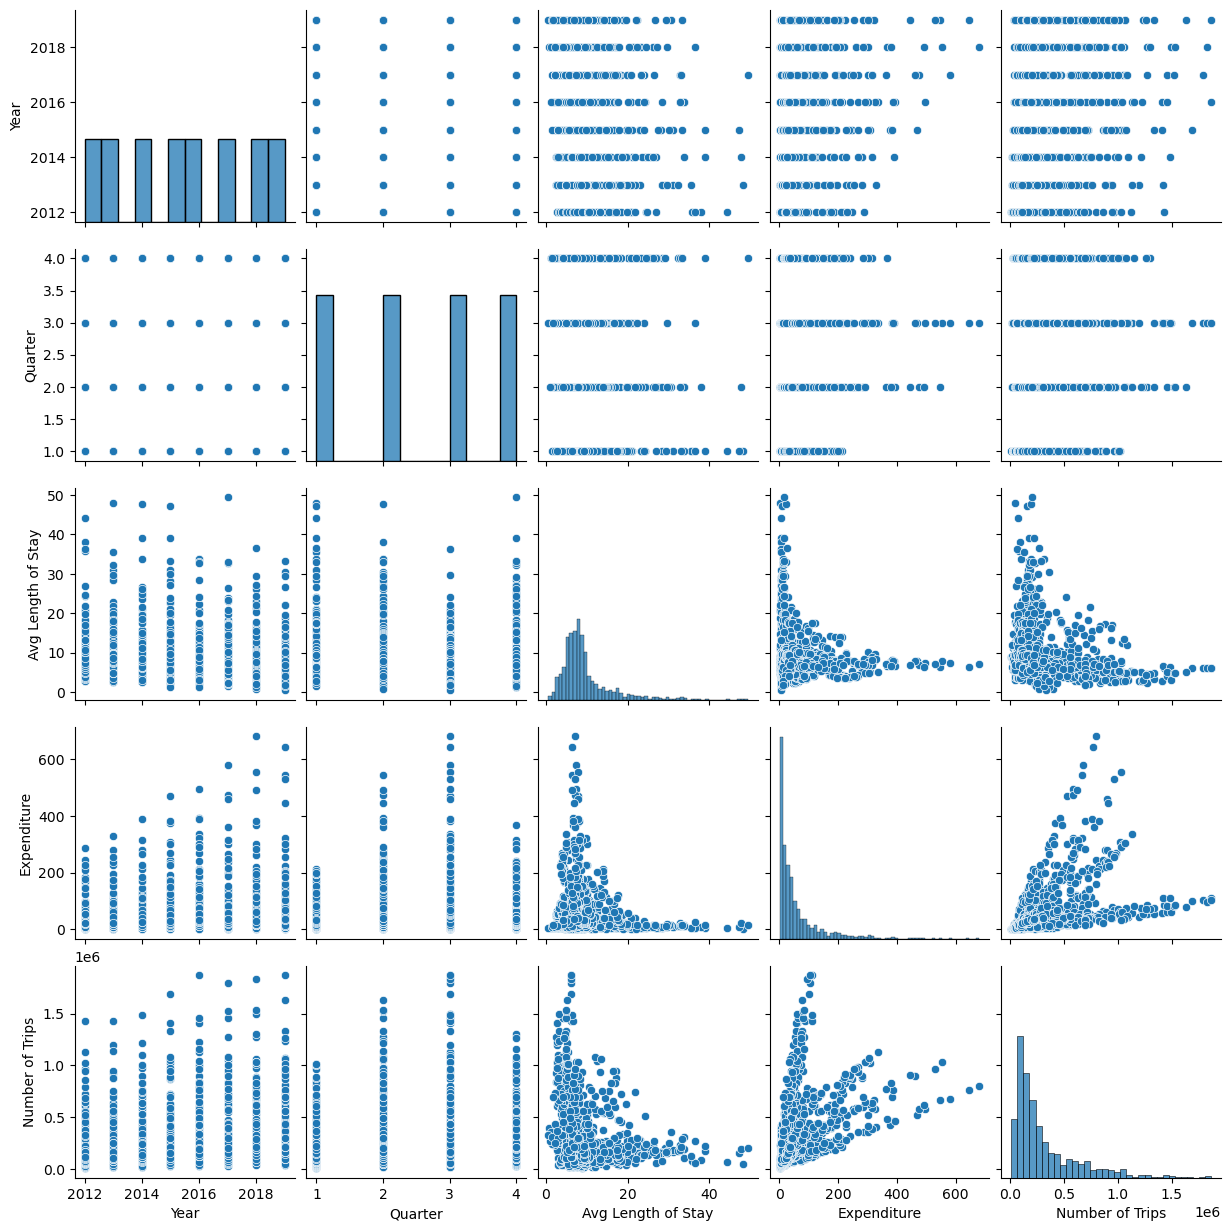

In [33]:
sns.pairplot(data_drop)

<Axes: >

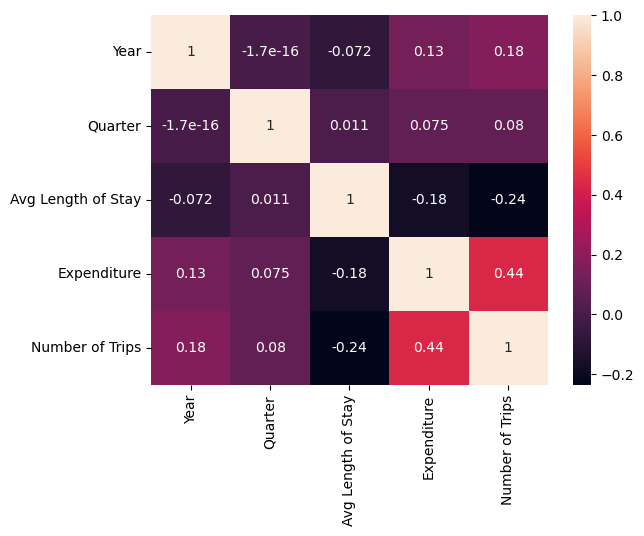

In [34]:
sns.heatmap(data_drop.drop(columns=data_drop.select_dtypes(include=['object']).columns).corr(), annot=True)

### Insights from Pairplot and Heatmap Correlation

Based on the analysis using **Pairplot** and **Heatmap Correlation**, the following key insights were derived about the dataset:

---

1. **Skewness in Data**:
   - The columns **Average Length of Stay**, **Expenditure**, and **Number of Trips** exhibit **right-skewed distributions**.
   - This indicates that most data points are concentrated on the left side of the distribution, with a tail extending to the right.

2. **High Variance**:
   - The numerical columns show **relatively high variance**, meaning the data is **dispersed and scattered**.
   - This suggests significant variability in the values, which may require normalization or scaling for further analysis.

3. **Correlation Between Columns**:
   - There is **low to medium correlation** between the columns.
   - No strong linear relationships were observed, indicating that the variables are mostly independent of each other.


### Visualizing the data

To better understand the distribution and spread of the numerical variables in the dataset, I use **histograms** and **boxplots**. These visualizations help identify patterns, skewness, outliers, and the overall spread of the data.

#### Why I Use Histograms and Boxplots
1. **Histograms**:
   - Show the distribution of a single numerical variable.
   - Help identify skewness, central tendency, and spread.
2. **Boxplots**:
   - Visualize the spread and outliers in the data.
   - Provide insights into the median, quartiles, and variability.

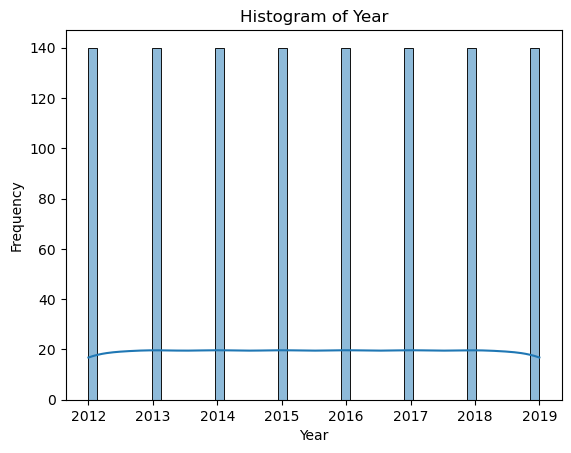

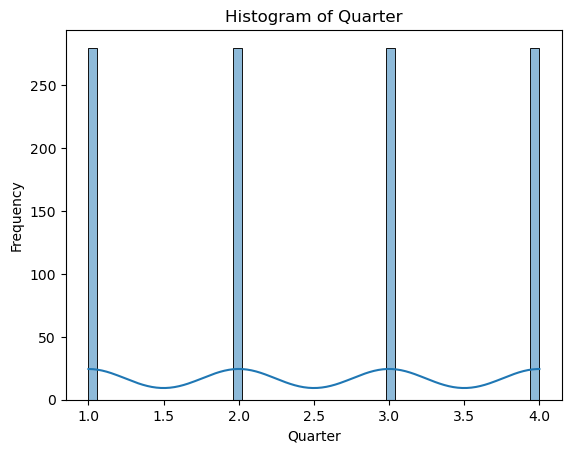

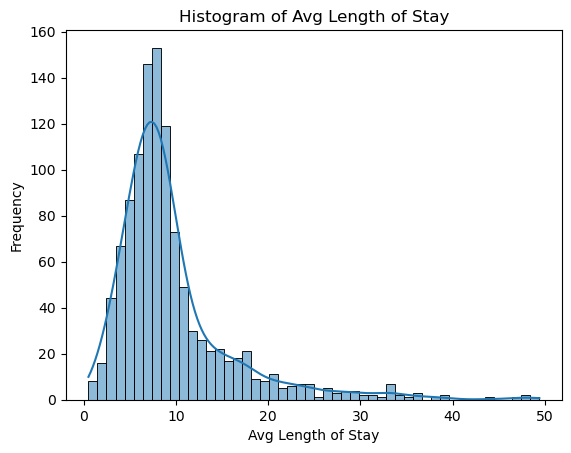

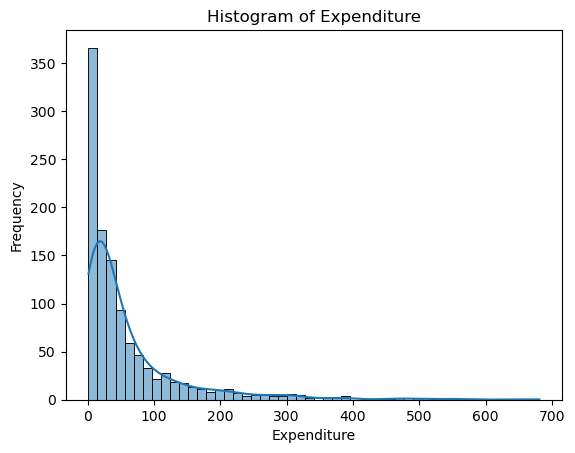

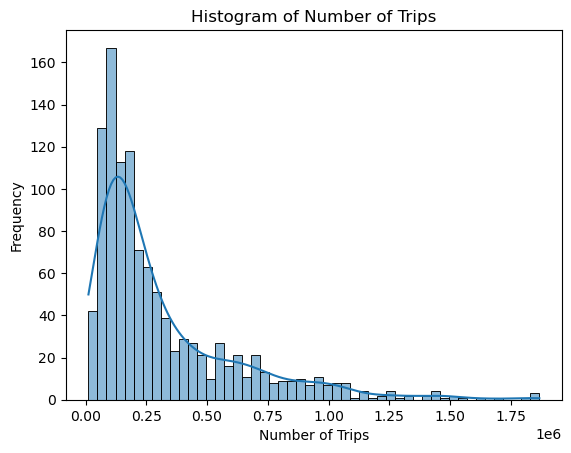

In [38]:
show_histplot(data_drop)

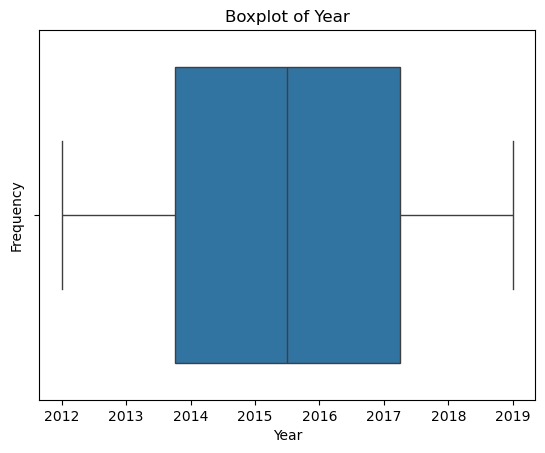

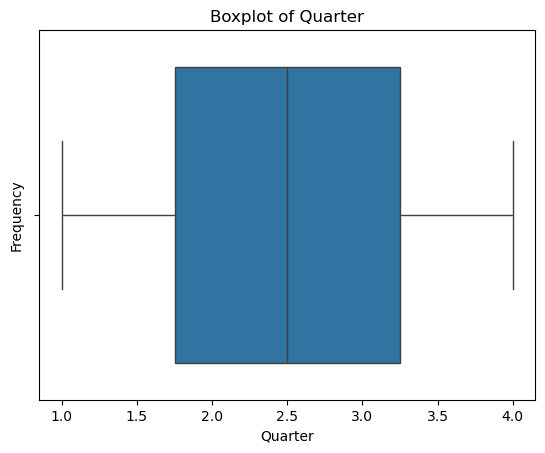

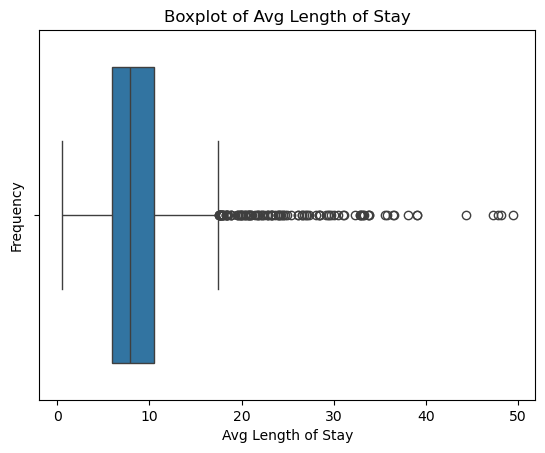

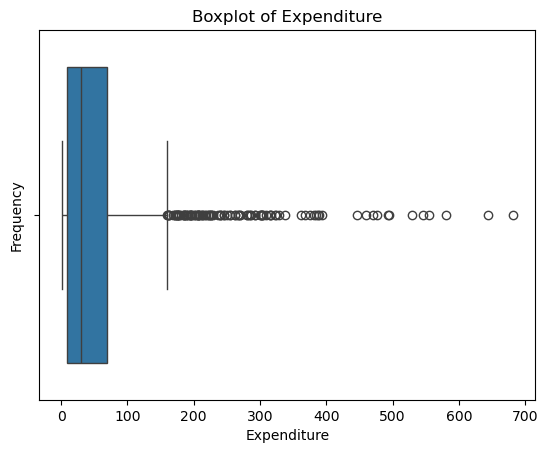

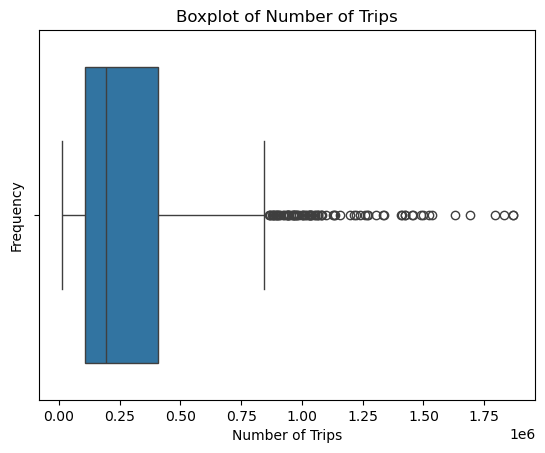

In [39]:
show_boxplot(data_drop)

## Counting Outliers

Since the dataset is **right-skewed** and contains outliers, I used the **Interquartile Range (IQR)** method to identify and count outliers. The IQR method is robust for skewed data and provides a clear threshold for outlier detection than Z-Score method. IQR method is less sensitive to extreme values compared to the Z-score method and works well for non-normally distributed data.

In [42]:
count_outliers_iqr(data_drop)

{'Year': 0,
 'Quarter': 0,
 'Avg Length of Stay': 110,
 'Expenditure': 108,
 'Number of Trips': 83}